<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Copy_of_Marketing_Campaign_Anand_Divakaran5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Scenario:** <br>‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.

**Problem Objective:** <br>As a data scientist, you should perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.

**Data Description:**<br>
The variables birth-year, education, income, and so on are related to the first 'P' or 'People' in the tabular data provided to the user. The amount spent on wine, fruits, gold, etc., is related to ‘Product’. The information pertinent to sales channels, like websites, stores, etc., is related to ‘Place’, and the fields which talk about promotions and results of different campaigns are related to ‘Promotion’.


In [ ]:
#install additional packages
!pip install pyjanitor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
#Import python packages
#Data Processing
import pandas as pd
import missingno as msno
import janitor
import re

#Linear Algebra
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Hypothesis Testing
from statsmodels.stats.weightstats import ztest as ztest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**#1. Import Data into a pandas dataframe**

In [ ]:
# Import the data into a data frame
df = pd.read_csv('marketing_data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**2. Data Analysis**

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
#Analyze the data with - shape
data_points, features = df.shape
print(f'Number of data points/rows: {data_points}')
print(f'Number of features/columns: {features}')

Number of data points/rows: 2240
Number of features/columns: 28


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Analyze the data with info() - identify features with null and check the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Initial Observations: <br>
1. The initial data set has 28 features and 2240 data points<br>
2. The column names needs to be cleaned - use pyjanitor package <br>
3. Missing values are found in the Income feature<br>
4. Income feature is a continueous variable but the data type is an object. Need to convert to a float after removing the commas and the currency type.<br>
5.Dt_Customer is a date feature but the data type is an object. Need to convert the data type to a date.<br>

In [ ]:
#Using seaborn/missing number package to visually inspect missing data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

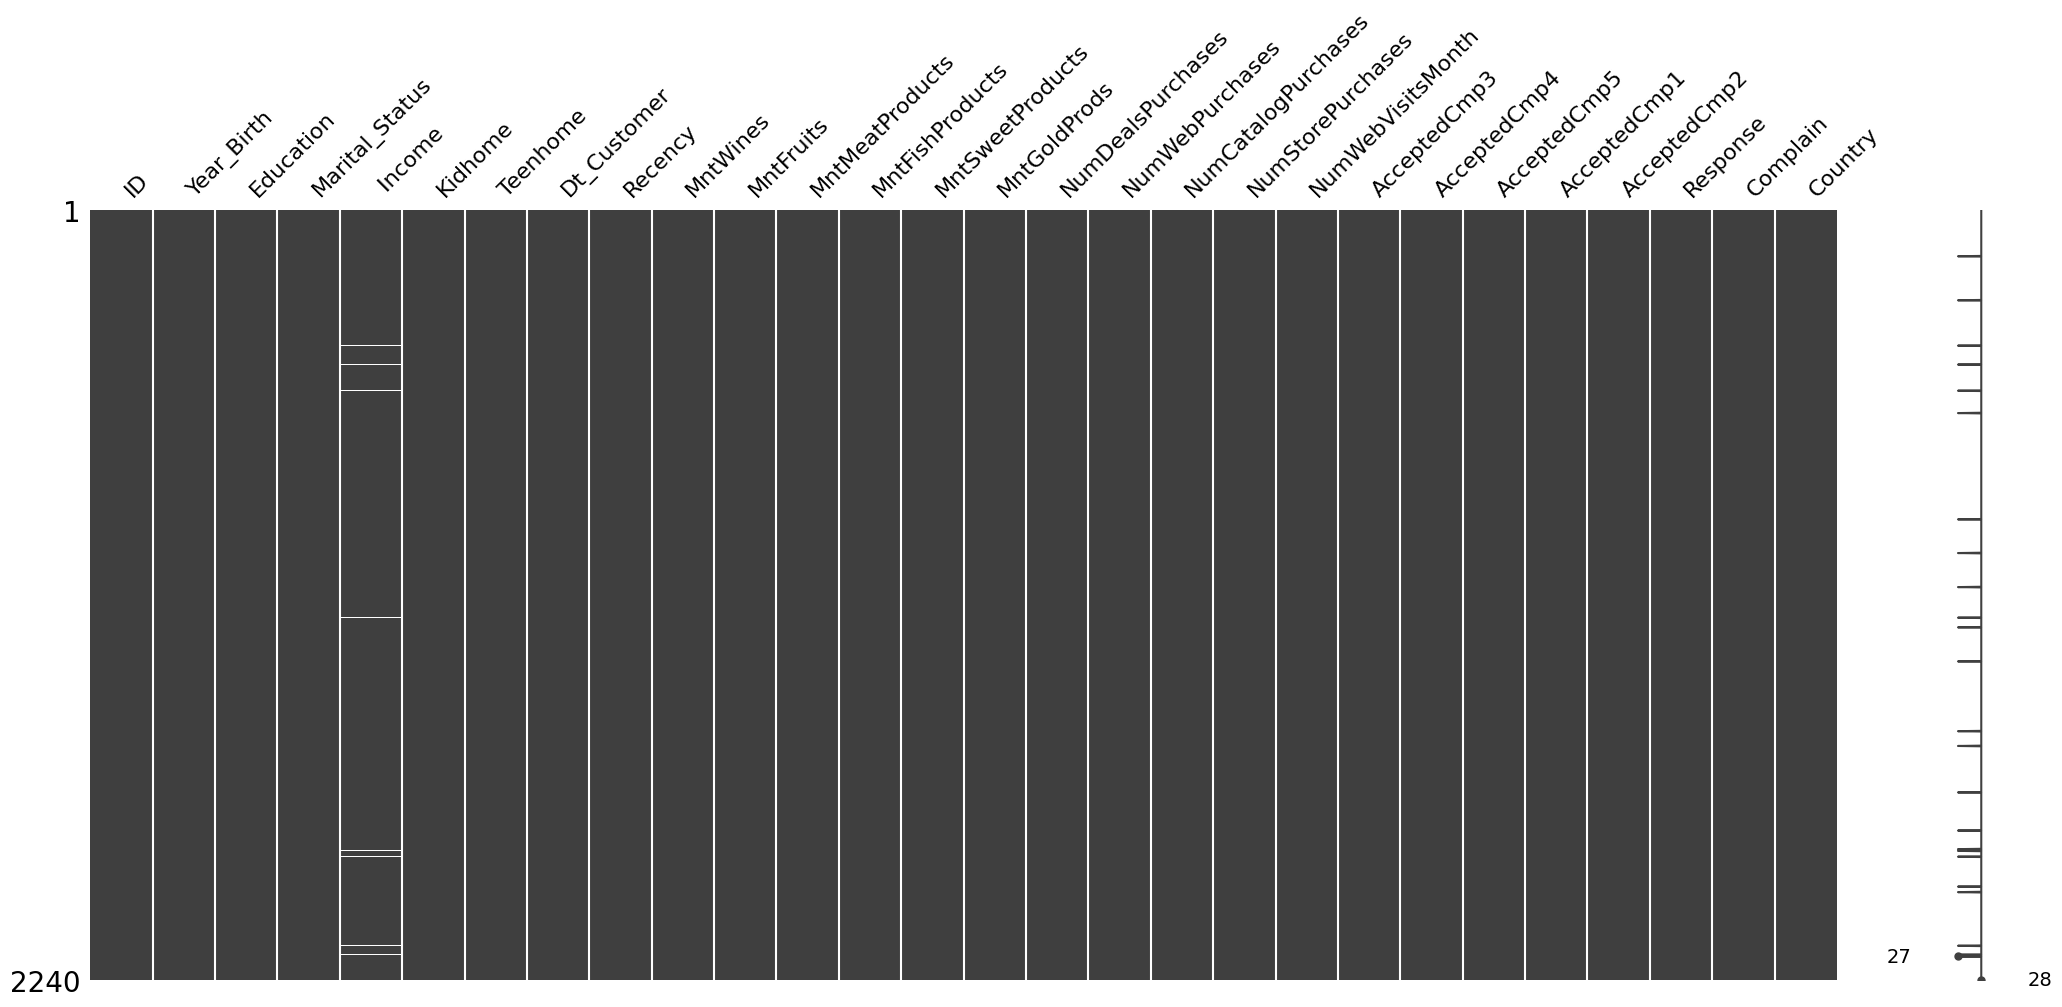

In [ ]:
msno.matrix(df)

Missing numbers found in the income feature

In [ ]:
# Clean the column names using janitor
df_clean = janitor.clean_names(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   year_birth           2240 non-null   int64 
 2   education            2240 non-null   object
 3   marital_status       2240 non-null   object
 4   _income_             2216 non-null   object
 5   kidhome              2240 non-null   int64 
 6   teenhome             2240 non-null   int64 
 7   dt_customer          2240 non-null   object
 8   recency              2240 non-null   int64 
 9   mntwines             2240 non-null   int64 
 10  mntfruits            2240 non-null   int64 
 11  mntmeatproducts      2240 non-null   int64 
 12  mntfishproducts      2240 non-null   int64 
 13  mntsweetproducts     2240 non-null   int64 
 14  mntgoldprods         2240 non-null   int64 
 15  numdealspurchases    2240 non-null   int64 
 16  numweb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The data type of the _income_ Feature is an object. Needs to convert it to a float64 after removing the $ and ,sign.

In [ ]:
#Fixing the data types of _income_
#Replace $ and commas with 0
df_clean['_income_'] = df_clean['_income_'].str.replace('[$,]', '', regex=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#convert the data type from object type to a float type.
df_clean['_income_'] = df_clean['_income_'].astype('float64')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The data type of dt_customer feature is object. Convert this to a datetime field.

In [ ]:
df_clean['dt_customer'] = pd.to_datetime(df_clean['dt_customer'], format = '%m/%d/%y')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#View the dataframe metadata after the corrections.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   _income_             2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.1 Feature Analysis- year_birth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='year_birth', ylabel='Count'>

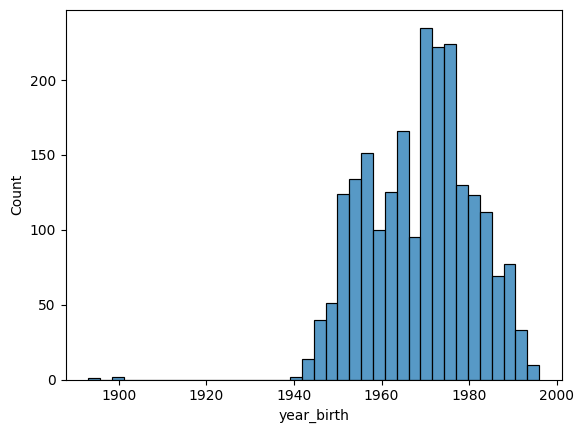

In [ ]:
#Analysing the year_birth column
sns.histplot(df_clean['year_birth'])

Observation[year_birth]
1. No Null values found
2. Outliers found in year_birth feature.
   Options:
  1. Ignore these rows/data points
  2. Set the birth year to the median birth year.
  3. Set the birth year to the minumum valid value - 1940
  4. Convert the year_birth to date time stamp



In [ ]:
#Identify the count of outliers
df_clean[df_clean['year_birth']<1940]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year_birth,education,marital_status,_income_,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND


As the percentage of outliers are minimal we can drop these rows from the dataset.

In [ ]:
#Dropping the data points with year_birth outlers.
df_clean.drop(df_clean[df_clean['year_birth']<1940].index,axis=0,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='year_birth', ylabel='Count'>

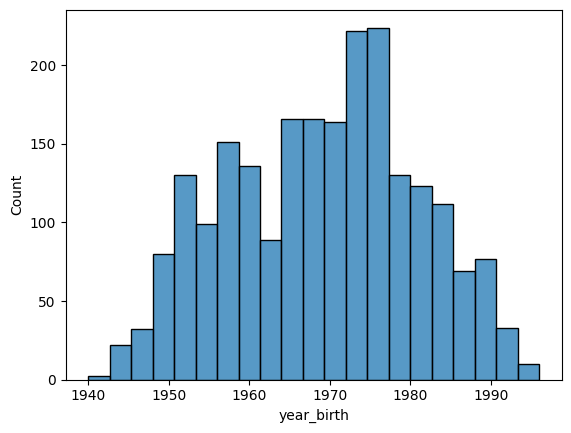

In [ ]:
#Analysing the year_birth column after removing the outliers
sns.histplot(df_clean['year_birth'])

In [ ]:
#View outlier date for year_birth <1940
df_clean[df_clean['year_birth'] < 1940]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year_birth,education,marital_status,_income_,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country


2.2 Feature Analsysis - Education

In [ ]:
#Analyse education feature
df_clean['education'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: education, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='education', ylabel='Count'>

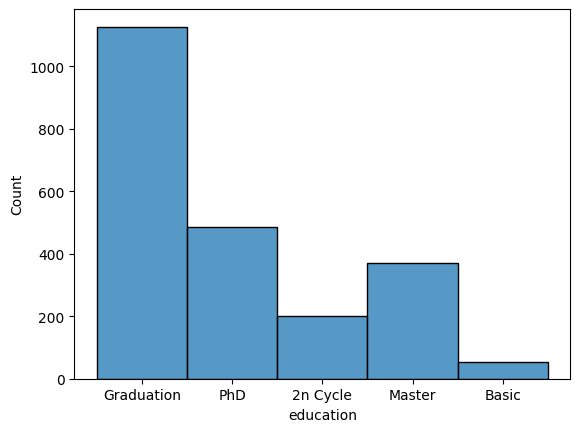

In [ ]:
sns.histplot(df_clean['education'])

Observations for education feature:
1. No null values found
2. Combine the 2nd Cycle education along with Master
2. Needs feature engineering using dummy varaibles to convert catagorial values to numeric values. We can perfrom an ordinal encoding on the fileds.

In [ ]:
#Combining the 2nd Cycle education along with Masters
df_clean[df_clean['education'] == '2n Cycle'] = df_clean[df_clean['education'] == '2n Cycle'].assign(education = 'Master')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='education', ylabel='Count'>

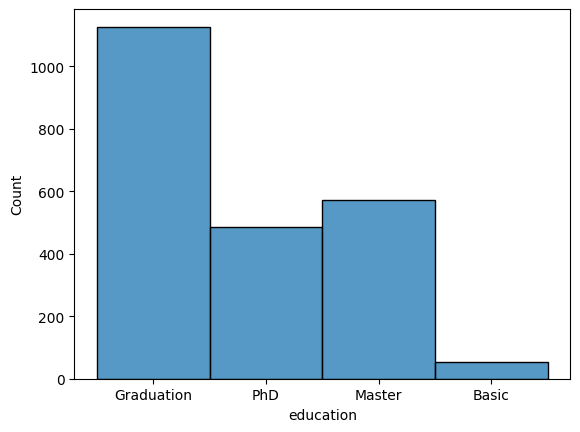

In [ ]:
#Polot after the conversion
sns.histplot(df_clean['education'])

In [ ]:
#Analyse education feature
df_clean['education'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graduation    1127
Master         571
PhD            485
Basic           54
Name: education, dtype: int64

2.3 Feature Analysis - marital_status

In [ ]:
# Check the variety of data in the marital_status field
df_clean['marital_status'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='marital_status', ylabel='Count'>

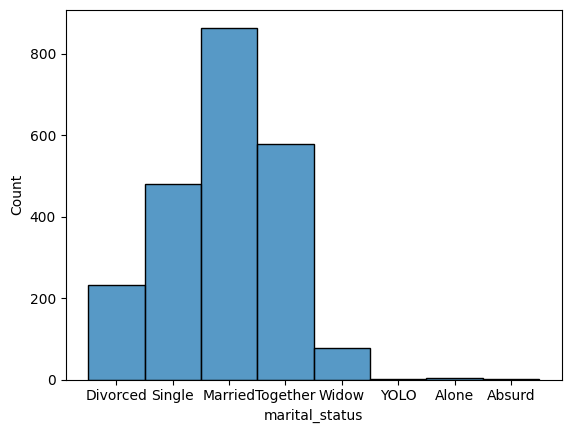

In [ ]:
sns.histplot(df_clean['marital_status'])

1. Null Values are not present
2. We could group the below categories together.
   1. Alone, Single
   2. Absurd and YOLO are in-valid married status and can be considered as 'single'
   3. One hot encoding could be applied on this feature.



In [ ]:
#Convert Alone status to Single
df_clean[df_clean['marital_status'] == 'Alone'] = df_clean[df_clean['marital_status'] == 'Alone'].assign(marital_status ='Single')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Convert Absured to Single
df_clean[df_clean['marital_status'] == 'Absurd'] = df_clean[df_clean['marital_status'] == 'Absurd'].assign(marital_status ='Single')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Convert YOLO to single
df_clean[df_clean['marital_status'] == 'YOLO'] = df_clean[df_clean['marital_status'] == 'YOLO'].assign(marital_status ='Single')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Check counts after conversion
df_clean['marital_status'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Married     864
Together    579
Single      486
Divorced    231
Widow        77
Name: marital_status, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='marital_status', ylabel='Count'>

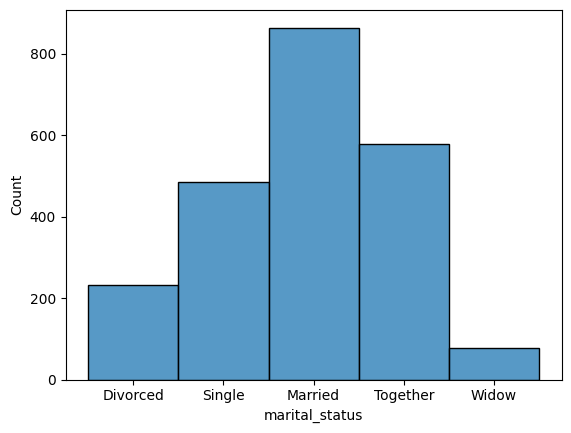

In [ ]:
#Plot a histogram of marital status
sns.histplot(df_clean['marital_status'])

2.4 Feature Analysis - Income
Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.

Observations
1. Outliers found and need to be handled  -  Refer Outlier Treatment Section
2. Feature has null values. Needs to employ numerical imputation and fill the null values with a mean of income for the data with same education and marital status - Refer Handling Missing Data Section


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='_income_', ylabel='Count'>

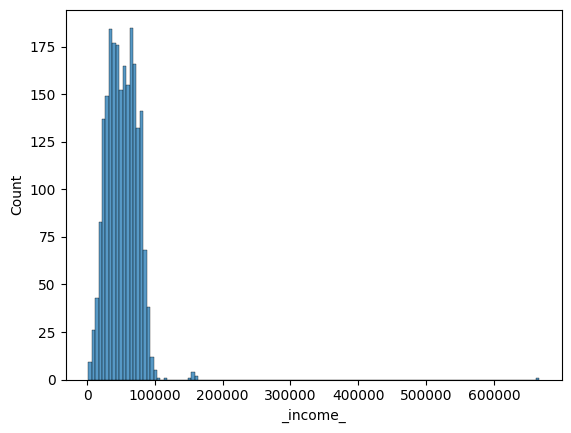

In [ ]:
#Draw a histogram to view the distribution - before removing the outliers
sns.histplot(df_clean['_income_'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

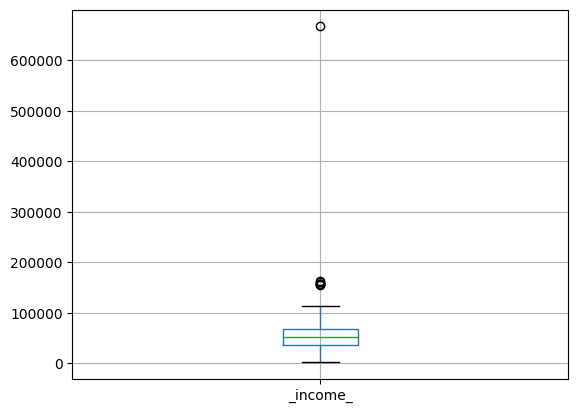

In [ ]:
df_clean.boxplot('_income_')

In [ ]:
#Removing Outliers from _income_ field
#identify first quartile
q1 = df_clean['_income_'].quantile(0.25)
#Identify 3rd quartile
q3 = df_clean['_income_'].quantile(0.75)
#calculate IQR
iqr = q3-q1
#calulate upper limit and lower limit
income_ul = q3+1.5*iqr
#caluclate lowere limit
income_ll = q1-1.5*iqr
print(f'Income Upper Limit:{income_ul}')
print(f'Income Lower Limit:{income_ll}')

Income Upper Limit:118348.5
Income Lower Limit:-14615.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2237, 28)

In [ ]:
#identify all outlier datapoints which falls above the upper limit and which falls below the lower limit
income_outliers = df_clean[(df_clean['_income_'] < income_ll) | (df_clean['_income_'] > income_ul)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
income_outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year_birth,education,marital_status,_income_,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,SP
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,0,0,SP
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,0,0,CA
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,IND


8 data points are outliers and we could remove them.

In [ ]:
#dropping outliers
df_clean.drop(income_outliers.index, axis = 0,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2229, 28)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

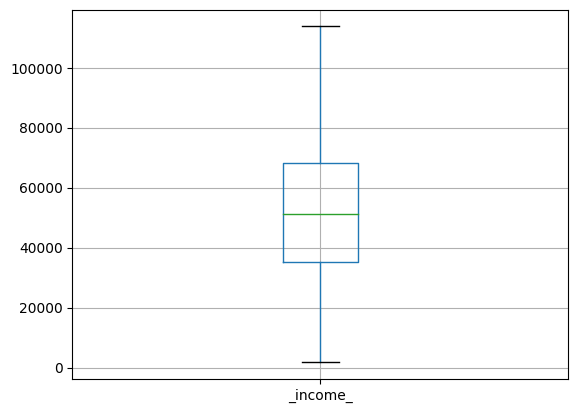

In [ ]:
# Plot the box plot after cleaning outliers.
df_clean.boxplot('_income_')

In [ ]:
df_clean[(df_clean['_income_'] < income_ll) | (df_clean['_income_'] > income_ul)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year_birth,education,marital_status,_income_,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country


No outliers exist in the income feature

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='_income_', ylabel='Count'>

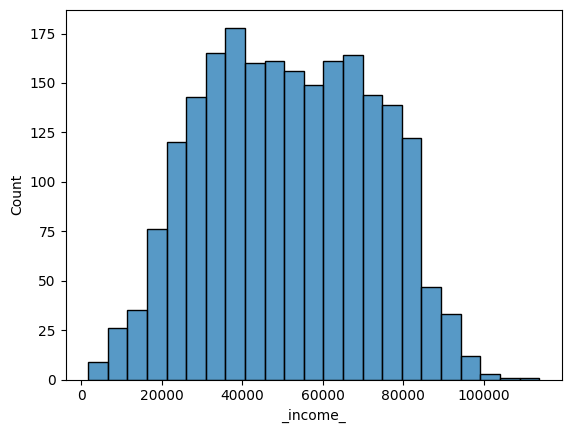

In [ ]:
#Draw a histogram after treating the outliers
sns.histplot(df_clean['_income_'])

Handling Null Values/Missing Data in the income field.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

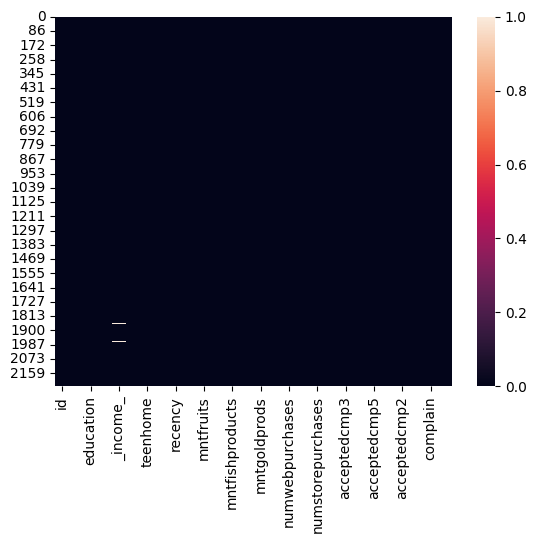

In [ ]:
#identify missing data using seaborn heatmap
sns.heatmap(df_clean.isnull())

In [ ]:
#Check the count
df_clean['_income_'].isnull().value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    2205
True       24
Name: _income_, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='_income_', ylabel='count'>

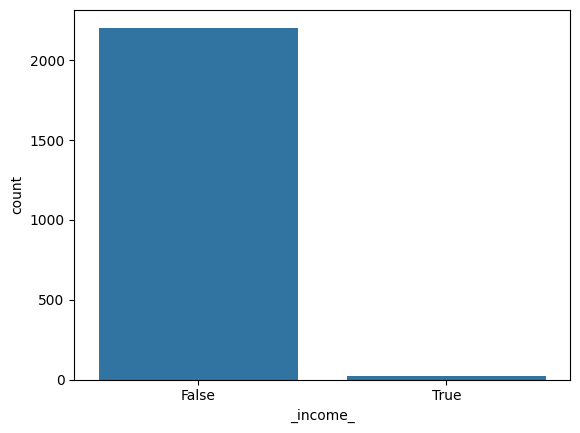

In [ ]:
sns.countplot(df_clean.isnull(),x='_income_')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24 records with NULL values found

Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.



In [ ]:
df_clean[df_clean['_income_'].isnull()][['education','marital_status']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,education,marital_status
134,PhD,Married
262,Graduation,Married
394,PhD,Together
449,Graduation,Single
525,PhD,Married
590,Master,Married
899,Master,Together
997,Graduation,Single
1096,Master,Single
1185,Master,Together


In [ ]:
#Calculate the mean income based on Education and Marital Status
round(df_clean[df_clean['_income_'].notnull()].groupby(['education','marital_status'])['_income_'].mean(),2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


education   marital_status
Basic       Divorced           9548.00
            Married           21960.50
            Single            18238.67
            Together          21240.07
            Widow             22123.00
Graduation  Divorced          53683.69
            Married           50800.26
            Single            51365.63
            Together          53241.54
            Widow             54976.66
Master      Divorced          50198.81
            Married           50686.06
            Single            53693.66
            Together          48806.53
            Widow             56211.12
PhD         Divorced          53096.62
            Married           56530.78
            Single            53039.67
            Together          54867.33
            Widow             60288.08
Name: _income_, dtype: float64

In [ ]:
#Calcualte the count of missing values grouped by education and martial status
#Calculate the mean income based on Education and Marital Status
df_clean[df_clean['_income_'].isnull()].groupby(['education','marital_status'])['id'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


education   marital_status
Graduation  Married           4
            Single            6
            Together          1
Master      Married           1
            Single            1
            Together          5
            Widow             1
PhD         Married           2
            Single            2
            Together          1
Name: id, dtype: int64

In [ ]:

#Update the missinge income for Graduation/Married combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Graduation') & (df_clean["marital_status"] == 'Married'), "_income_"] =  50800.26
#Update the missinge income for Graduation/Single combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Graduation') & (df_clean["marital_status"] == 'Single'), "_income_"] =  51365.63
#Update the missinge income for Graduation/Together combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Graduation') & (df_clean["marital_status"] == 'Together'), "_income_"] =  53241.54
#Update the missinge income for Master/Married combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Master') & (df_clean["marital_status"] == 'Married'), "_income_"] =  50686.06
#Update the missinge income for Master/Single combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Master') & (df_clean["marital_status"] == 'Single'), "_income_"] =  53751.08
#Update the missinge income for Master/Together combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Master') & (df_clean["marital_status"] == 'Together'), "_income_"] =  48806.53
#Update the missinge income for Master/Widow combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'Master') & (df_clean["marital_status"] == 'Widow'), "_income_"] =  56211.12
#Update the missinge income for PhD/Married combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'PhD') & (df_clean["marital_status"] == 'Married'), "_income_"] =  56530.78
#Update the missinge income for PhD/Single combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'PhD') & (df_clean["marital_status"] == 'Single'), "_income_"] =  52420.34
#Update the missinge income for PhD/Together combination
df_clean.loc[(df_clean["_income_"].isnull()) & (df_clean["education"] == 'PhD') & (df_clean["marital_status"] == 'Together'), "_income_"] =  55116.59

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#identify missing data using seaborn heatmap
df_clean.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                     0
year_birth             0
education              0
marital_status         0
_income_               0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
response               0
complain               0
country                0
dtype: int64

Missing values in the income feature are resolved

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2229 non-null   int64         
 1   year_birth           2229 non-null   int64         
 2   education            2229 non-null   object        
 3   marital_status       2229 non-null   object        
 4   _income_             2229 non-null   float64       
 5   kidhome              2229 non-null   int64         
 6   teenhome             2229 non-null   int64         
 7   dt_customer          2229 non-null   datetime64[ns]
 8   recency              2229 non-null   int64         
 9   mntwines             2229 non-null   int64         
 10  mntfruits            2229 non-null   int64         
 11  mntmeatproducts      2229 non-null   int64         
 12  mntfishproducts      2229 non-null   int64         
 13  mntsweetproducts     2229 non-nul

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.5 Feature Analysis - Kidhome

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='kidhome', ylabel='Count'>

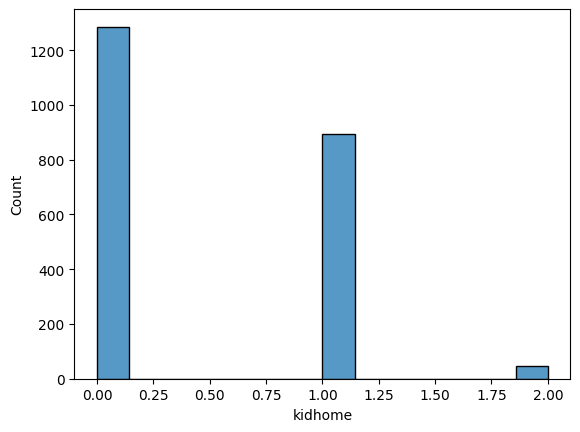

In [ ]:
#Histogram for kidhome
sns.histplot(df_clean['kidhome'])

2.6 Feature Analysis teen home

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='teenhome', ylabel='Count'>

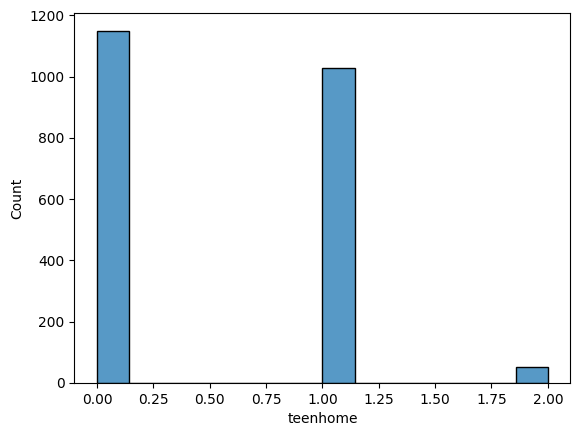

In [ ]:
sns.histplot(df_clean['teenhome'])

2.7 Feature Analysis - dt_customer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='dt_customer', ylabel='Count'>

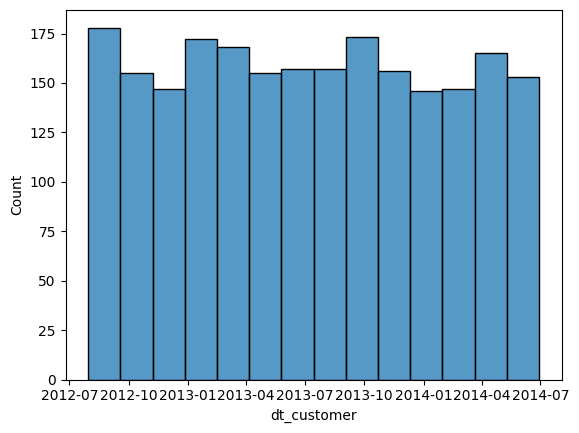

In [ ]:
sns.histplot(df_clean['dt_customer'])

2.8 Feature Analysis - recency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='recency', ylabel='Count'>

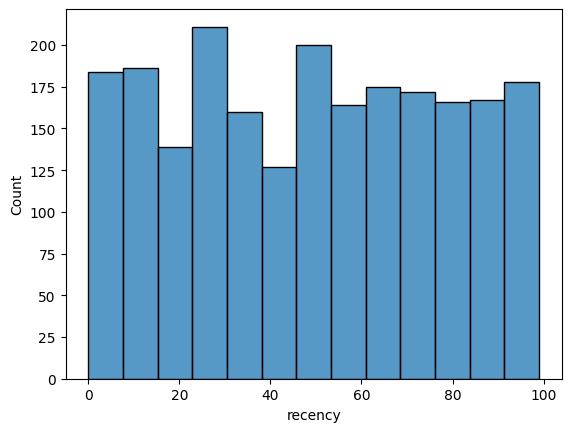

In [ ]:
sns.histplot(df_clean['recency'])

2.9 Feature Analysis - mntwines

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='mntwines', ylabel='Count'>

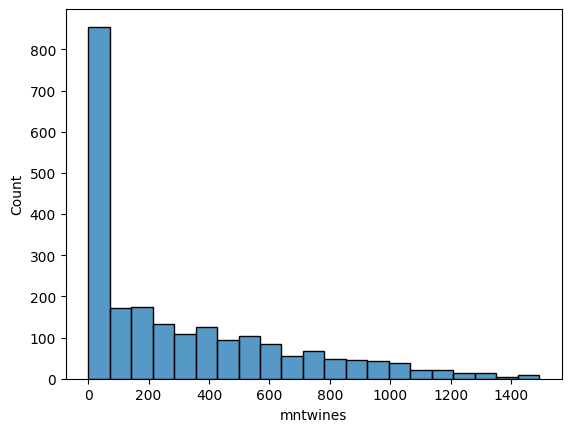

In [ ]:
sns.histplot(df_clean['mntwines'])

2.10 Feature Analysis - mntfruits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='mntfruits', ylabel='Count'>

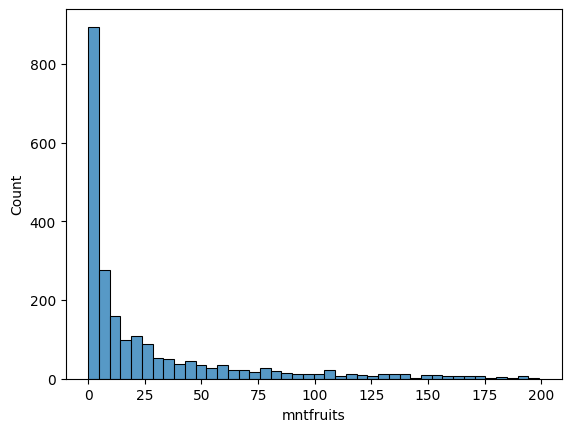

In [ ]:
sns.histplot(df_clean['mntfruits'])

2.11 Feature Analysis - mntmeatproducts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='mntmeatproducts', ylabel='Count'>

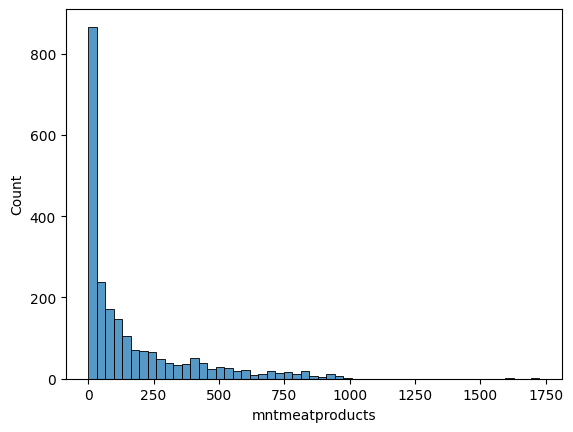

In [ ]:
sns.histplot(df_clean['mntmeatproducts'])

2.12 Feature Analsyis - mntfishproducts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='mntfishproducts', ylabel='Count'>

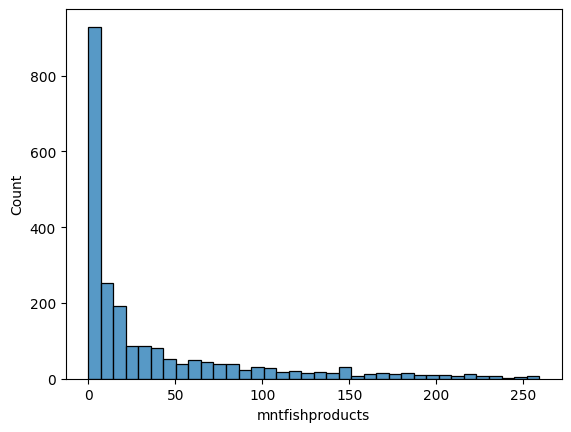

In [ ]:
sns.histplot(df_clean['mntfishproducts'])

2.13 Feature Analysis - mntsweetproducts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='mntsweetproducts', ylabel='Count'>

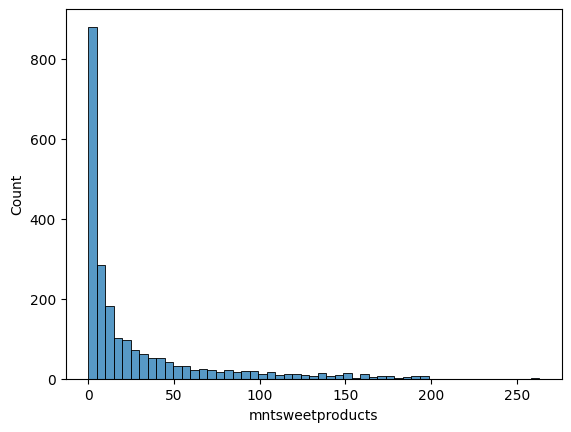

In [ ]:
sns.histplot(df_clean['mntsweetproducts'])

2.14 Feature Analysis - mntgoldprods

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='mntgoldprods', ylabel='Count'>

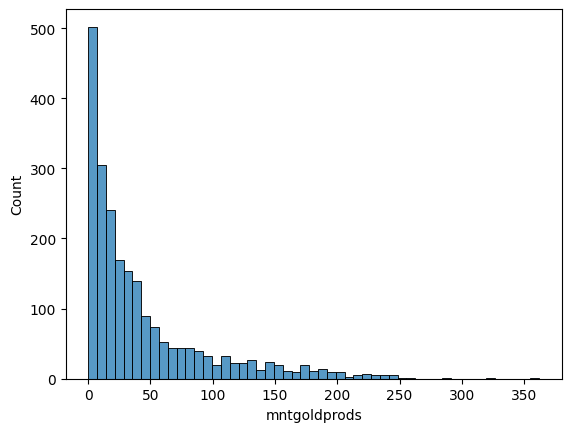

In [ ]:
sns.histplot(df_clean['mntgoldprods'])

2.15 Feature Analysis - numdealspurchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='numdealspurchases', ylabel='Count'>

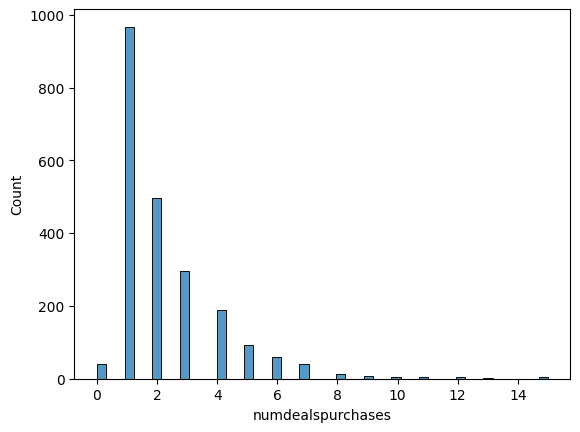

In [ ]:
sns.histplot(df_clean['numdealspurchases'])

2.16 Feature Analysis - numwebpurchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='numwebpurchases', ylabel='Count'>

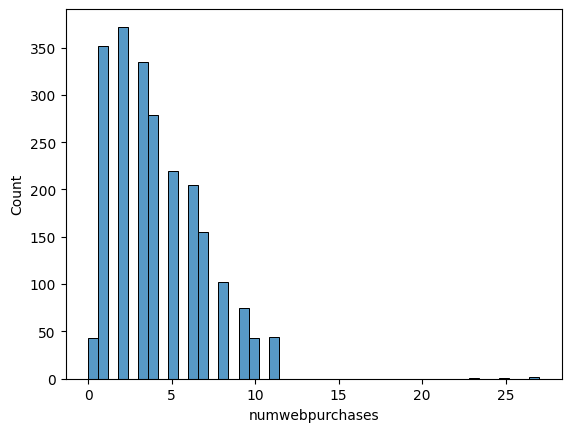

In [ ]:
sns.histplot(df_clean['numwebpurchases'])

2.17 Feature Engineering - numcatalogpurchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='numcatalogpurchases', ylabel='Count'>

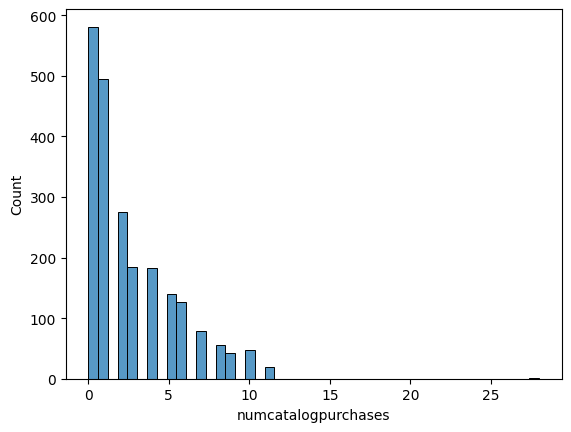

In [ ]:
sns.histplot(df_clean['numcatalogpurchases'])

2.18 Feature Analysis - numwebvisitsmonth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='numwebvisitsmonth', ylabel='Count'>

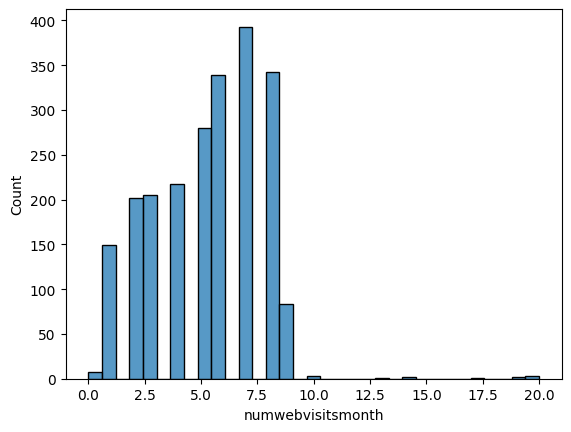

In [ ]:
sns.histplot(df_clean['numwebvisitsmonth'])

2.19 Analysis of the acceptedcmp features acceptedcmp3 acceptedcmp4 acceptedcmp5 acceptedcmp1 acceptedcmp5

**Make sure that the data is boolean

In [ ]:
df_clean['acceptedcmp3'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    2066
1     163
Name: acceptedcmp3, dtype: int64

In [ ]:
df_clean['acceptedcmp4'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    2062
1     167
Name: acceptedcmp4, dtype: int64

In [ ]:
df_clean['acceptedcmp5'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    2067
1     162
Name: acceptedcmp5, dtype: int64

In [ ]:
df_clean['acceptedcmp1'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    2085
1     144
Name: acceptedcmp1, dtype: int64

In [ ]:
df_clean['acceptedcmp2'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    2199
1      30
Name: acceptedcmp2, dtype: int64

2.20 Feature analysis - response

In [ ]:
df_clean['response'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    1895
1     334
Name: response, dtype: int64

2.21 Feature Analysis - complain

In [ ]:
df_clean['complain'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    2209
1      20
Name: complain, dtype: int64

2.22 Feature Analysis - country

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='country', ylabel='Count'>

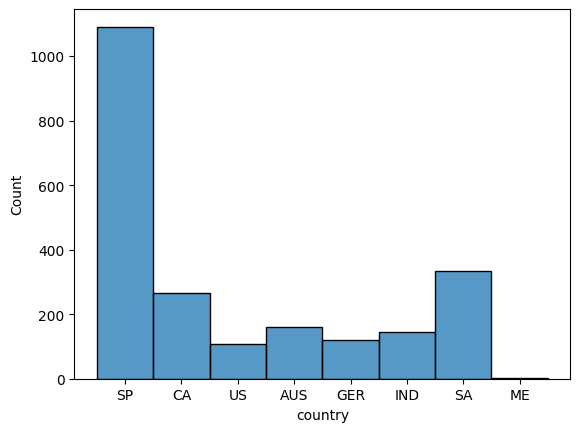

In [ ]:
sns.histplot(df_clean['country'])

# **3. Feature Engineering**
3.1 Create variables to populate the total number of children, age, and total spending.

In [ ]:
#Create a new feature age
df_clean['age'] = pd.Timestamp.today().year - df_clean['year_birth']

#Create a new column for total number of childern
df_clean['totnumchildern'] = df_clean['kidhome'] + df_clean['teenhome']

#Create a column for total spending
df_clean['totalspend'] = df_clean['mntwines'] + df_clean['mntfruits'] + df_clean['mntmeatproducts'] + df_clean['mntfishproducts'] + df_clean['mntsweetproducts'] + df_clean['mntgoldprods']

#Create a new colume for total number of purchases
df_clean['totalpurchase'] = df_clean['numdealspurchases'] + df_clean['numwebpurchases'] + df_clean['numcatalogpurchases'] + df_clean['numstorepurchases']

#Create a new colume for total number of non-store purchases
df_clean['totalnonstorepurchase'] = df_clean['numdealspurchases'] + df_clean['numwebpurchases'] + df_clean['numcatalogpurchases']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2229 non-null   int64         
 1   year_birth             2229 non-null   int64         
 2   education              2229 non-null   object        
 3   marital_status         2229 non-null   object        
 4   _income_               2229 non-null   float64       
 5   kidhome                2229 non-null   int64         
 6   teenhome               2229 non-null   int64         
 7   dt_customer            2229 non-null   datetime64[ns]
 8   recency                2229 non-null   int64         
 9   mntwines               2229 non-null   int64         
 10  mntfruits              2229 non-null   int64         
 11  mntmeatproducts        2229 non-null   int64         
 12  mntfishproducts        2229 non-null   int64         
 13  mnt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='age', ylabel='Count'>

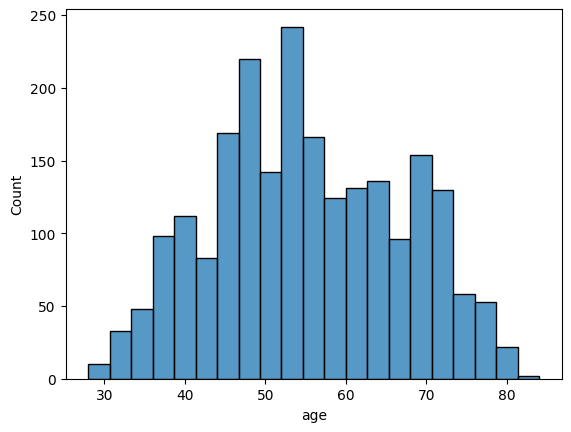

In [ ]:
#Analysing the age column
sns.histplot(df_clean['age'])

 3.2 Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [ ]:
df_clean['education'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graduation    1124
Master         570
PhD            481
Basic           54
Name: education, dtype: int64

In [ ]:
 #Ordinal encoding for Education feature
 edu_map = {'Basic':1, 'Graduation':2, 'Master':3,'PhD':4}
 df_clean['education'] = df_clean['education'].replace(edu_map)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean['education'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2    1124
3     570
4     481
1      54
Name: education, dtype: int64

In [ ]:
df_clean['marital_status'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [ ]:
#One-hot-encoding for marital status feature
df_clean1 = pd.get_dummies(df_clean, columns=['marital_status'], drop_first=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Add an age group feature
# If age >= 50 - Old
#
# If age >= 40 and <50  Middle age
#
# If age < 40 Young age

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def age_group(x):
  if x >= 50:
    return "Old"
  elif x >= 40 and x <50:
    return "Middle"
  else:
    return "Young"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean['age_group'] = df_clean.age.map(age_group)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_clean.age_group.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Old', 'Young', 'Middle'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='age', ylabel='Count'>

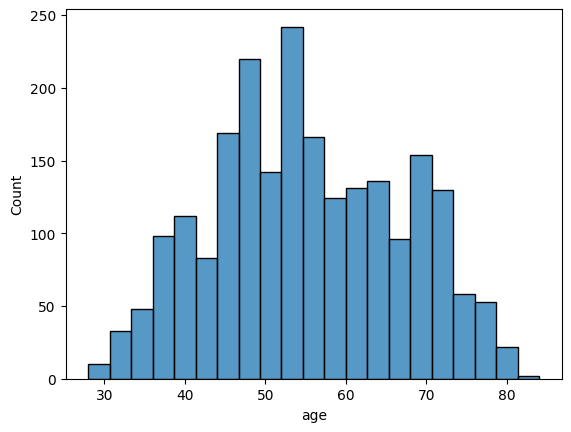

In [ ]:
sns.histplot(df_clean['age'])

# **4. Exploratory Data Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='_income_', ylabel='Density'>

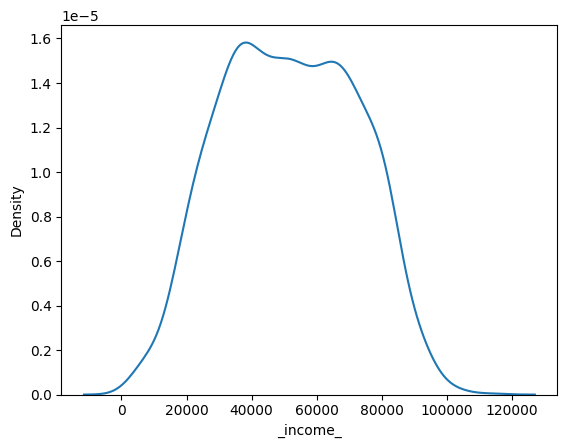

In [ ]:
#income distribution
sns.kdeplot(data=df_clean, x='_income_')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='country', ylabel='Count'>

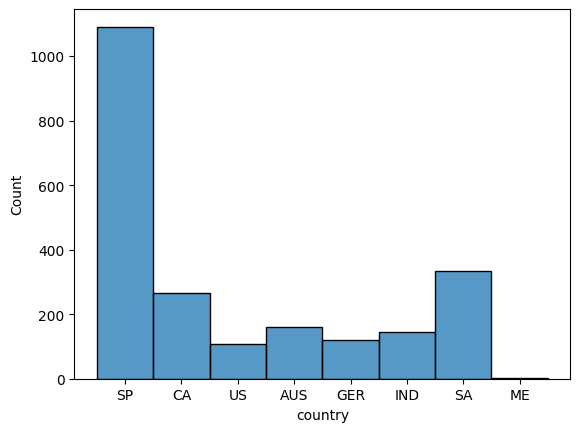

In [ ]:
#Sample Distribution by country
sns.histplot(df_clean['country'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='education', ylabel='_income_'>

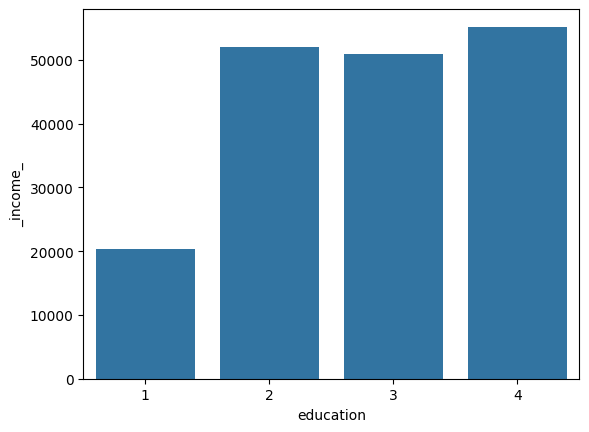

In [ ]:
#Barplot for income vs Education
sns.barplot(data=df_clean,x='education',y='_income_',errorbar=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='age_group', ylabel='_income_'>

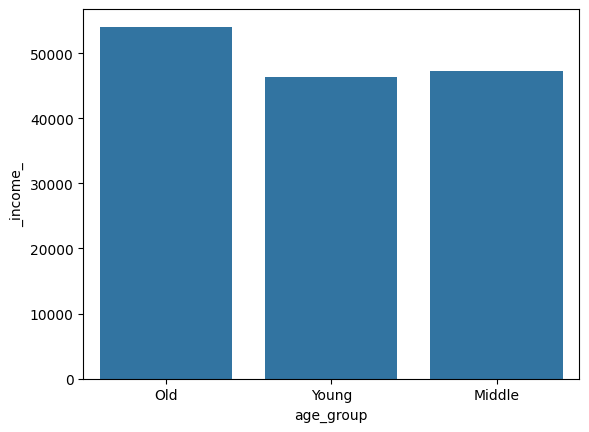

In [ ]:
#Age group by Income
sns.barplot(data=df_clean,x='age_group',y='_income_',errorbar=None)

Inference -
1. People with higher education have a higher income.
2. People with a graduate degree and masters degree has almost the same income
3. People with a PhD has a slightly higher income than people with masters/graduate degree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='marital_status', ylabel='_income_'>

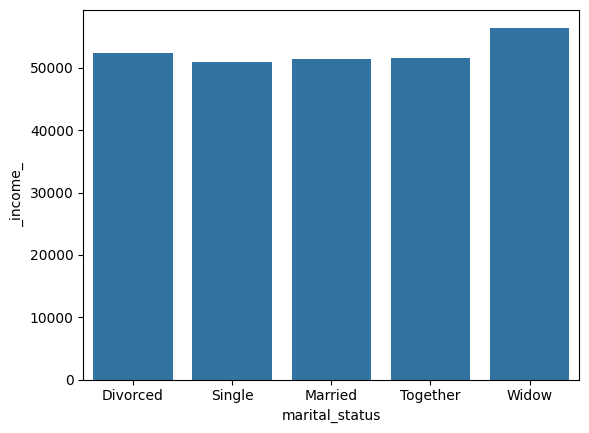

In [ ]:
#Barplot for income vs marital status
sns.barplot(data=df_clean,x='marital_status',y='_income_',errorbar=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-9ebde28e4457>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True)


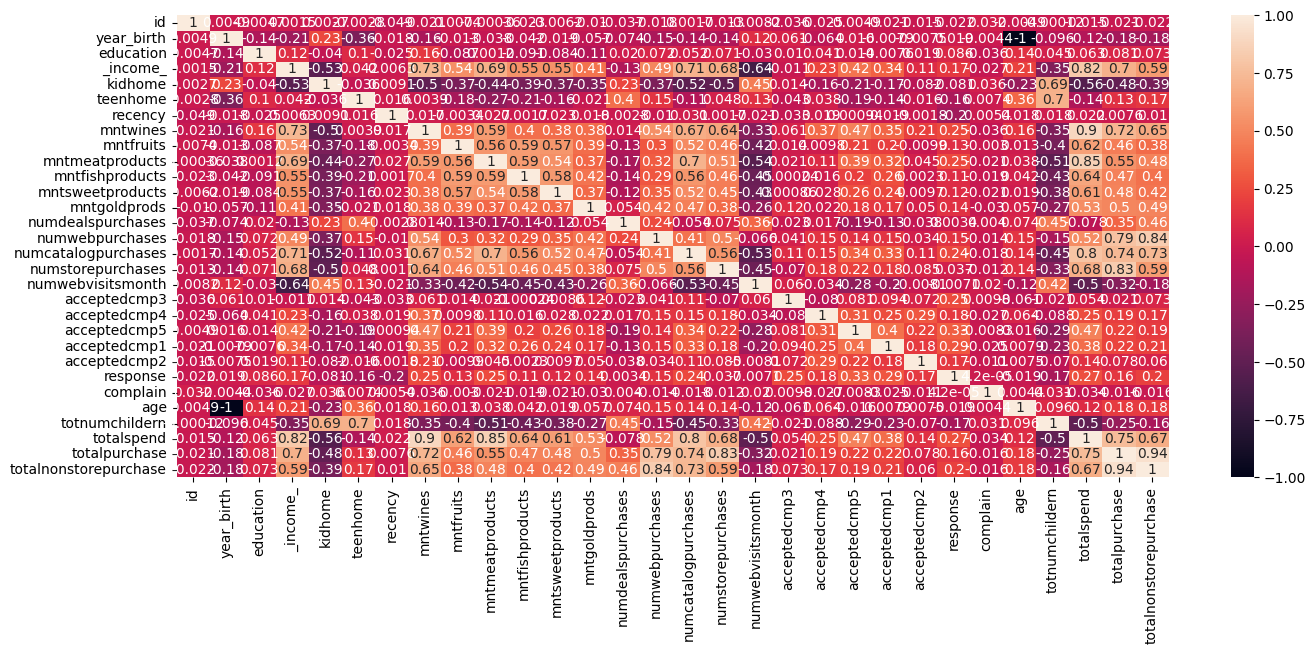

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True)

# **5.Hypothesis Testing**

5.1 Older people are not as tech-savvy and probably prefer shopping in-store. <br>
Null Hypothesis<br>
H0:Ud = 0 (Older people (like younger people) are tech-savvy and probably prefer shopping online).Impact of age is insignificant in online shopping. <br>
Alternate Hypothesis.<br>
H1:Ud <> 0 (Older people are not as tech-savvy and probably prefer shopping in-store)



In [ ]:
#create a data frame to hold the summary of store and web purchases for every ager group
df_pur_by_agegrp = df_clean.groupby(['age_group'])['numwebpurchases','numstorepurchases'].apply(lambda x : x.astype(int).sum())
df_pur_by_agegrp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-129-04a1e9583d16>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pur_by_agegrp = df_clean.groupby(['age_group'])['numwebpurchases','numstorepurchases'].apply(lambda x : x.astype(int).sum())


,numwebpurchases,numstorepurchases
age_group,,
Middle,2080,2953
Old,6318,8784
Young,741,1219


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='age_group'>

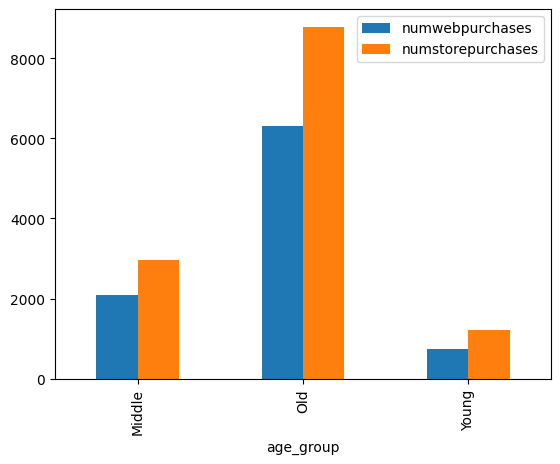

In [ ]:
df_pur_by_agegrp.plot.bar()

From the distribution of data it is clear that older people prefers to shop over store.

In [ ]:
df_clean_old = df_clean[df_clean['age_group']=='Old'][['age_group','numwebpurchases','numstorepurchases']]
df_clean_not_old = df_clean[df_clean['age_group']!='Old'][['age_group','numwebpurchases','numstorepurchases']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


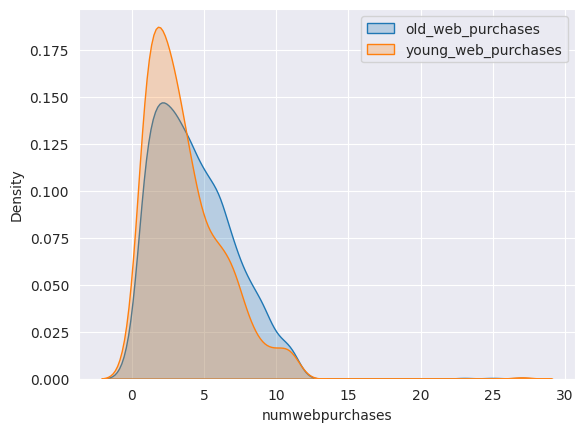

In [ ]:
#Kernal density plot for older and younger people - web shopping pattern
sns.set_style('darkgrid')
sns.kdeplot(df_clean_old['numwebpurchases'],fill = True, label='old_web_purchases')
sns.kdeplot(df_clean_not_old['numwebpurchases'],fill = True,label='young_web_purchases')
plt.legend()

In [ ]:
#A Z-test is used when we want to compare the sample means of two samples with the population mean when the sample size is greater than 30.
#2 sample t-test to com
#Assuming no difference in behavior the differnce of mean of both samples is zero.
ztest(df_clean_old['numwebpurchases'],df_clean_not_old['numwebpurchases'],value = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5.623550961375223, 1.8707154201413552e-08)

Observations:

- We can see that the p-value is very low; hence, we need to reject the null hypothesis.

- Older people are not as tech-savvy and probably prefer shopping in-store

Older people make more store purchases than younger people

5.2 Customers with kids probably have less time to visit a store and would prefer to shop online. <br>


Null Hypothesis<br>
H0:Ud = 0 There is no difference in the online shopping behavior of customers with kids and without kids. They visit store more like customers without kids.<br>
H1:Ud <> 0 Customers with kids probably have less time to visit a store and would prefer to shop online


In [ ]:
df_kids = df_clean[['totnumchildern','numstorepurchases','numwebpurchases']]
df2 = df_kids.groupby(["totnumchildern"]).sum()
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,numstorepurchases,numwebpurchases
totnumchildern,,
0,4630,2799
1,6302,4827
2,1814,1361
3,210,152


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='totnumchildern'>

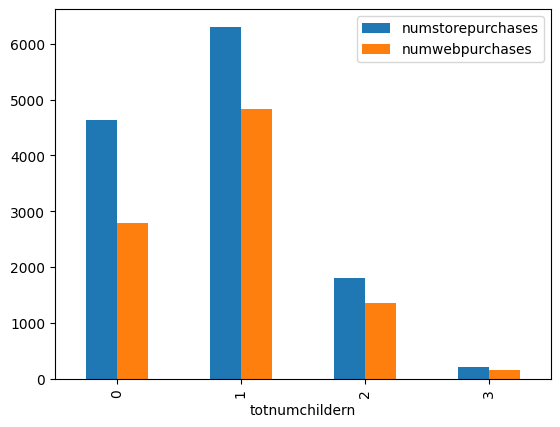

In [ ]:
df2.plot.bar()

Based on the data, customers with more kids likes to shop on store.

In [ ]:
#df_clean_old = df_clean[df_clean['age_group']=='Old'][['age_group','numwebpurchases','numstorepurchases']]
df_kids_zero = df_clean[df_clean['totnumchildern'] == 0][['totnumchildern','numstorepurchases','numwebpurchases']]
df_kids_gt_zero = df_clean[df_clean['totnumchildern'] > 0][['totnumchildern','numstorepurchases','numwebpurchases']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


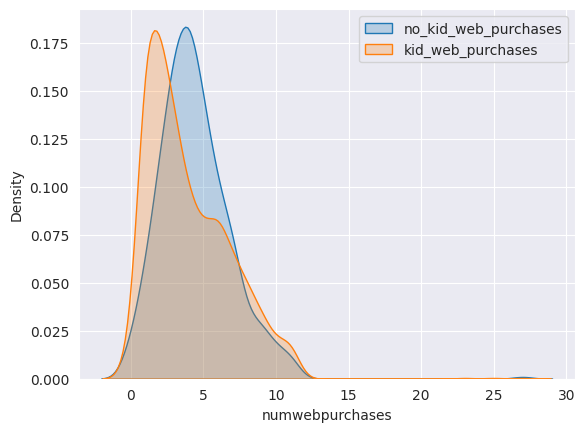

In [ ]:
#Kernal density plot for older and younger people - web shopping pattern
sns.set_style('darkgrid')
sns.kdeplot(df_kids_zero['numwebpurchases'],fill = True, label='no_kid_web_purchases')
sns.kdeplot(df_kids_gt_zero['numwebpurchases'],fill = True,label='kid_web_purchases')
plt.legend()

In [ ]:
#A Z-test is used when we want to compare the sample means of two samples with the population mean when the sample size is greater than 30.
#2 sample t-test to com
#Assuming no difference in behavior the differnce of mean of both samples is zero.
ztest(df_kids_zero['numwebpurchases'],df_kids_gt_zero['numwebpurchases'],value = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14.397197792422888, 5.388433602888347e-47)

Observations:

- We can see that the p-value is low thn 0.05; hence, we need to reject the null hypothesis.

- Customers with kids probably have less time to visit a store and would prefer to shop online

5.3 Other distribution channels may cannibalize sales at the store.

Null Hypothesis<br>
H0:Ud = 0 Other distribution channels will not cannibalize sales at store. <br>
Alternate Hypothesis.<br>
H1:Ud <> 0 Other distribution channels may cannibalize sales at the store.


In [ ]:
sales = {'nonstore_purchase':(df_clean.numdealspurchases.sum()+ df_clean.numwebpurchases.sum()+df_clean.numcatalogpurchases.sum()),'store_purchases':df_clean.numstorepurchases.sum()}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sales = pd.DataFrame(sales,index = [0])
df_sales

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nonstore_purchase,store_purchases
0,20187,12956


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


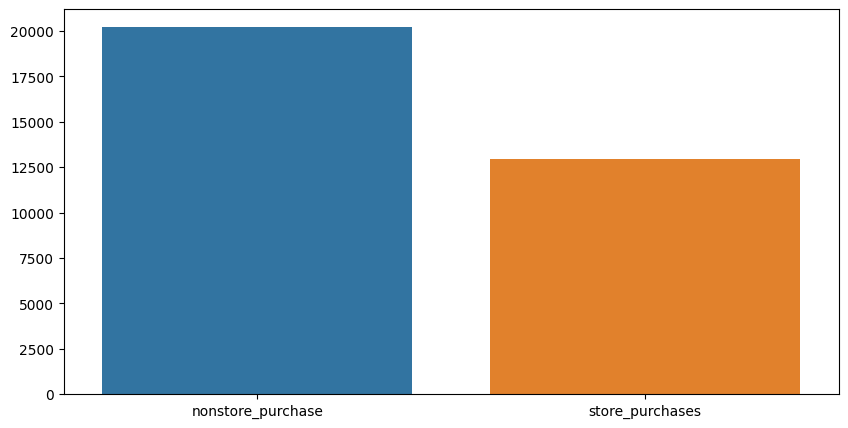

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df_sales,ax=ax)
plt.show()

Total number of non-store purchases are more than store purchases and hence the other avenues could cannibalize the sales at the stores.

5.4 Does the US fare significantly better than the rest of the world in terms of total purchases?

In [ ]:
#Total purchse per country
#df_clean.groupby(df_clean['country'])['totalpurchase'].sum()
df_sales1 = df_clean.groupby('country').agg({'totalpurchase': ['sum','count']})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sales1['totalpurchase']['count']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


country
AUS     160
CA      267
GER     120
IND     146
ME        3
SA      334
SP     1091
US      108
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='totalpurchase', ylabel='Density'>

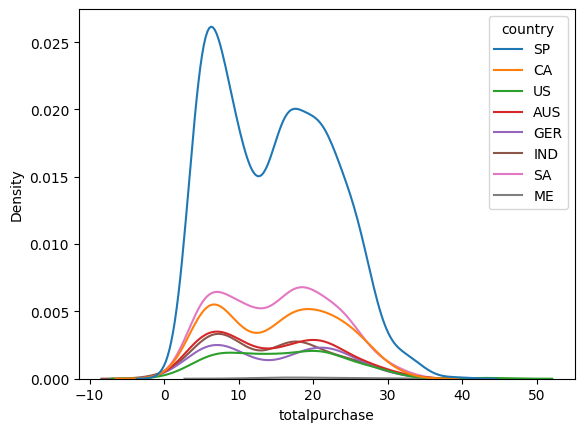

In [ ]:
sns.kdeplot(data=df_clean,x='totalpurchase',hue='country')

In [ ]:
#Store Vs non-stre purches for Spain
df_clean_spain = df_clean[df_clean['country'] == 'SP']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


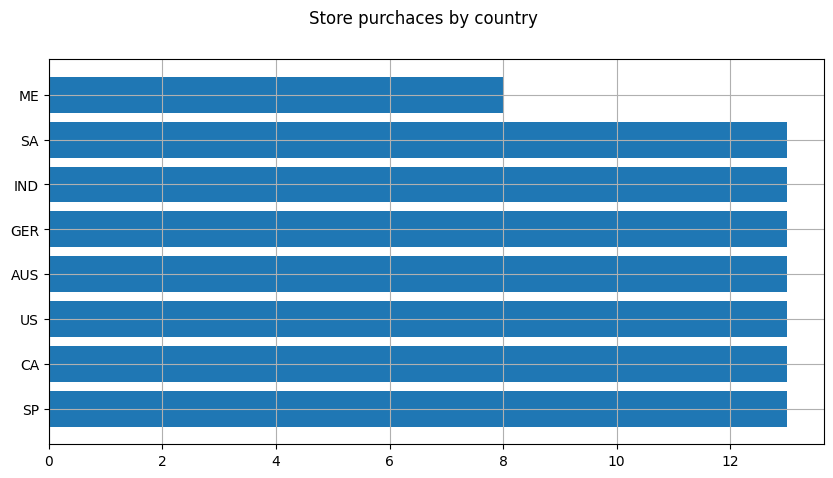

In [ ]:
#plt.figure(figsize = (4,3))
#plt.barh('cut','avg_price',data=cut)
fig, ax = plt.subplots()
bars = ax.barh('country','numstorepurchases',data=df_clean)
#ax.bar_label(bars)
fig.suptitle("Store purchaces by country")
fig.set_size_inches(10,5)
#ax.tick_params(np.arange(0,5000,250))
ax.grid(alpha=1)
fig.show()

In [ ]:
#Store Vs non-stre purches
df_clean_purchase = df_clean.groupby('country')['numstorepurchases','totalnonstorepurchase'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-105-ba5699407b85>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clean_purchase = df_clean.groupby('country')['numstorepurchases','totalnonstorepurchase'].sum()


In [ ]:
sns.barplot(df_clean_purchase, x="island", y="body_mass_g", hue="country")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Could not interpret value `island` for `x`. An entry with this name does not appear in `data`.

In [ ]:
df_clean.info()